In [1]:
from lxml import etree
import progressbar
from pyparlaclarin.read import paragraph_iterator, speeches_with_name
from pyriksdagen.utils import protocol_iterators, download_corpus
import pyriksdagen
# We need a parser for reading in XML data
parser = etree.XMLParser(remove_blank_text=True)

In [2]:
print(pyriksdagen.__spec__)
download_corpus(partitions=["persons", "records"])

ModuleSpec(name='pyriksdagen', loader=<_frozen_importlib_external.SourceFileLoader object at 0x10fcbde90>, origin='/Users/erafkin/Desktop/School/graduate/2024-2025/semantics/final_project/du-comparison/venv/lib/python3.11/site-packages/pyriksdagen/__init__.py', submodule_search_locations=['/Users/erafkin/Desktop/School/graduate/2024-2025/semantics/final_project/du-comparison/venv/lib/python3.11/site-packages/pyriksdagen'])


persons.zip: 100%|██████████| 2.23M/2.23M [00:00<00:00, 17.0MiB/s]

13:51:26 [WARNING] (pyriksdagen): data already exists at the path 'data'. It will be overwritten once the download is finished.



records.zip: 100%|██████████| 1.63G/1.63G [01:51<00:00, 15.7MiB/s]


In [11]:
protocols = list(protocol_iterators(corpus_root="data/", start=1857, end=202223))
len(protocols)

/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_1362/2551419196.py:1: DeprecationWarning: protocol_iterators is replaced by corpus_iterator() and may be removed in future versions -- use that instead.
  protocols = list(protocol_iterators(corpus_root="data/", start=1857, end=202223))


17935

In [45]:
from tqdm import tqdm
import pandas as pd

rows = []
for protocol_in_question in tqdm(protocols):
    ni_count = 0
    du_count = 0 
    year = protocol_in_question.split("-")[1]
    if len(year)>4:
        year = year[0:4]
    root = etree.parse(protocol_in_question, parser).getroot()
    paragraphs = []
    for elem in list(paragraph_iterator(root, output="lxml")):
        paragraphs.append("".join([e for e in elem.itertext()]))
    
    text = "".join(paragraphs)
    text.count("du")
    text = text.lower()
    text_stripped = [t.strip() for t in text.split()]
    for t in text_stripped:
        if "ni" == t:
            ni_count +=1
        if "du" == t:
            du_count +=1
    rows.append([year, ni_count, du_count])
df = pd.DataFrame(rows, columns=["year", "ni_count", "du_count"])
df = df.groupby('year', as_index=False)[['ni_count', "du_count"]].sum()
df["year"] = pd.to_numeric(df["year"])

df.to_csv("./swedish_ni_du_counts.csv", index=False)

100%|██████████| 17935/17935 [05:55<00:00, 50.52it/s]


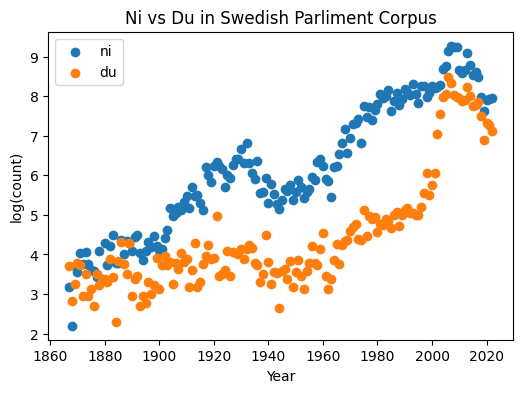

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("./swedish_ni_du_counts.csv")
fig,ax=plt.subplots(figsize=(6, 4))

ax.scatter(x=df.year, y=np.log(df.ni_count), label='ni')
ax.scatter(x=df.year, y=np.log(df.du_count), label='du')
plt.legend()
ax.set_xlabel("Year")
ax.set_ylabel("log(count)")

ax.set_title('Ni vs Du in Swedish Parliment Corpus')
plt.show()

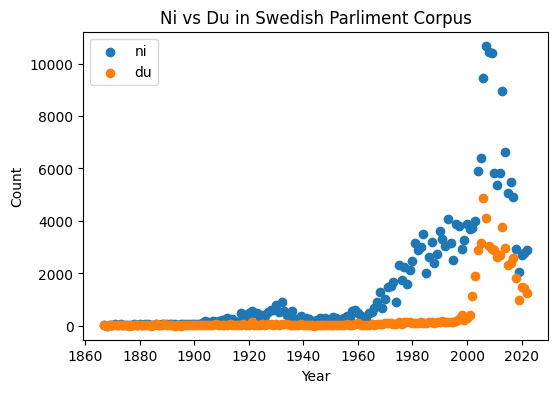

In [6]:
fig,ax=plt.subplots(figsize=(6, 4))

ax.scatter(x=df.year, y=df.ni_count, label='ni')
ax.scatter(x=df.year, y=df.du_count, label='du')
plt.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Count")

ax.set_title('Ni vs Du in Swedish Parliment Corpus')
plt.show()